In [ ]:
!cd "/content/drive/MyDrive/TFM/src"

In [ ]:
!pip install ultralytics

In [ ]:
!pip install roboflow

In [ ]:
from ultralytics import YOLO
from roboflow import Roboflow

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
rf = Roboflow(api_key="7KkdDvPyHQNgET4pyuLS")
project = rf.workspace("tfm-ahbh5").project("tfm-breakfast")
version = project.version(1)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
classes = ['Bowl',
           'Cereals',
           'Milk']

In [ ]:
# model = YOLO('yolov9c.pt')


# # Train the model
# results = model.train(data='/content/TFM-Breakfast-1/data.yaml', epochs=100, imgsz=640)

In [ ]:
model = YOLO('/content/drive/MyDrive/TFM/runs/detect/train6/weights/best.pt')

In [ ]:
results = model.predict('/content/TFM-Breakfast-1/test/images/IMG_0682_mov-0008_jpg.rf.72fe8f7d215907c8aba251aad3ea8440.jpg')


image 1/1 /content/TFM-Breakfast-1/test/images/IMG_0682_mov-0008_jpg.rf.72fe8f7d215907c8aba251aad3ea8440.jpg: 640x640 2 Bowls, 2488.6ms
Speed: 4.7ms preprocess, 2488.6ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
print(results[0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0.])
conf: tensor([0.9467, 0.8182])
data: tensor([[206.9709, 148.9163, 457.2863, 284.6684,   0.9467,   0.0000],
        [  1.6949,   0.0000, 193.7300,  26.2052,   0.8182,   0.0000]])
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([2, 6])
xywh: tensor([[332.1286, 216.7923, 250.3154, 135.7521],
        [ 97.7125,  13.1026, 192.0351,  26.2052]])
xywhn: tensor([[0.5190, 0.3387, 0.3911, 0.2121],
        [0.1527, 0.0205, 0.3001, 0.0409]])
xyxy: tensor([[206.9709, 148.9163, 457.2863, 284.6684],
        [  1.6949,   0.0000, 193.7300,  26.2052]])
xyxyn: tensor([[0.3234, 0.2327, 0.7145, 0.4448],
        [0.0026, 0.0000, 0.3027, 0.0409]])


In [ ]:
# Assuming 'result' is the output of model.predict
img = mpimg.imread(results[0].path)


In [ ]:
detections = results

# Extraer bounding boxes y etiquetas
boxes = []
labels = []
confidences = []

for detection in detections:
    x, y, w, h = detection.boxes.xywh[0]
    x -= w/2
    y -= h/2
    label = classes[int(detection.boxes.cls[0])]
    confidence = detection.boxes.conf[0]
    boxes.append((x, y, w, h))
    labels.append(label)
    confidences.append(confidence)

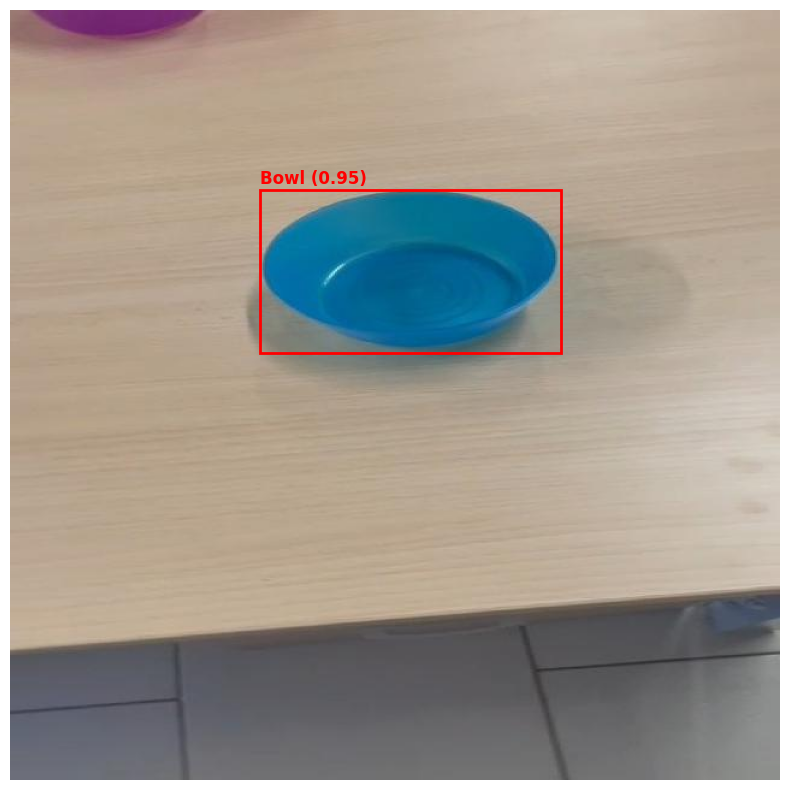

In [ ]:
def plot_boxes(image, boxes, labels, confidences):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    for (x, y, w, h), label, confidence in zip(boxes, labels, confidences):
        rect = plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        ax.text(x, y - 5, f'{label} ({confidence:.2f})', color='red', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()

plot_boxes(img, boxes, labels, confidences)

In [ ]:
results = model.predict('/content/TFM-Breakfast-1/test/images/VID_20240304_183658487_mp4-0021_jpg.rf.6b70025113abd731275856de48b4e53e.jpg')


image 1/1 /content/TFM-Breakfast-1/test/images/VID_20240304_183658487_mp4-0021_jpg.rf.6b70025113abd731275856de48b4e53e.jpg: 640x640 1 Cereals, 2515.0ms
Speed: 3.7ms preprocess, 2515.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Assuming 'result' is the output of model.predict
img = mpimg.imread(results[0].path)

In [ ]:
detections = results

# Extraer bounding boxes y etiquetas
boxes = []
labels = []
confidences = []

for detection in detections:
    x, y, w, h = detection.boxes.xywh[0]
    x -= w/2
    y -= h/2
    label = classes[int(detection.boxes.cls[0])]
    confidence = detection.boxes.conf[0]
    boxes.append((x, y, w, h))
    labels.append(label)
    confidences.append(confidence)

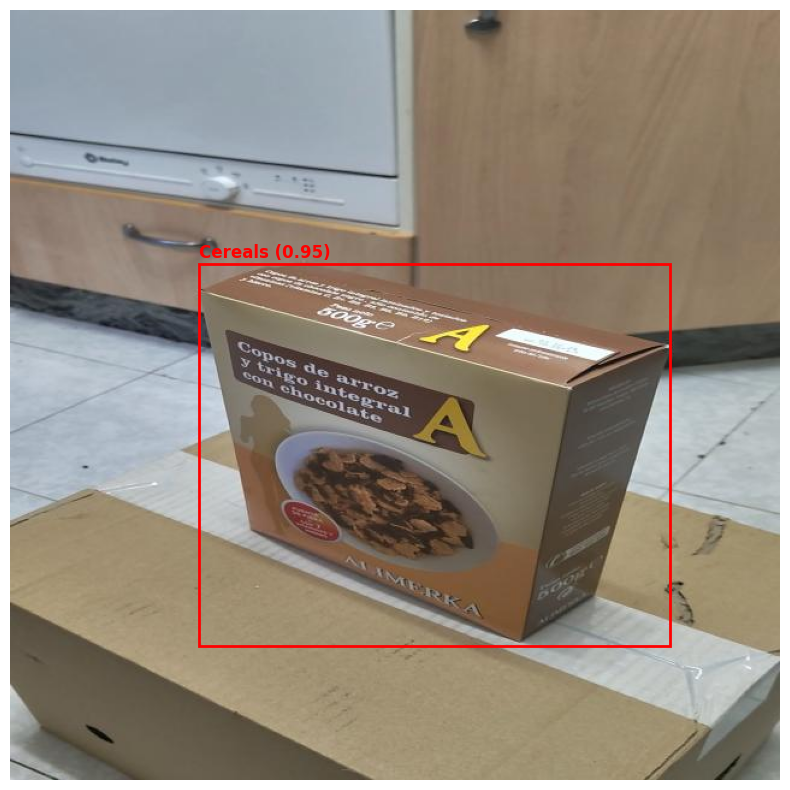

In [ ]:
def plot_boxes(image, boxes, labels, confidences):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    for (x, y, w, h), label, confidence in zip(boxes, labels, confidences):
        rect = plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        ax.text(x, y - 5, f'{label} ({confidence:.2f})', color='red', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()

plot_boxes(img, boxes, labels, confidences)

In [ ]:
results = model.predict('/content/TFM-Breakfast-1/test/images/VID_20240304_183506549_mp4-0046_jpg.rf.2ecd56d2abe8df2e325325409030ac33.jpg')


image 1/1 /content/TFM-Breakfast-1/test/images/VID_20240304_183506549_mp4-0046_jpg.rf.2ecd56d2abe8df2e325325409030ac33.jpg: 640x640 1 Milk, 2472.4ms
Speed: 12.5ms preprocess, 2472.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Assuming 'result' is the output of model.predict
img = mpimg.imread(results[0].path)

In [ ]:
detections = results

# Extraer bounding boxes y etiquetas
boxes = []
labels = []
confidences = []

for detection in detections:
    x, y, w, h = detection.boxes.xywh[0]
    x -= w/2
    y -= h/2
    label = classes[int(detection.boxes.cls[0])]
    confidence = detection.boxes.conf[0]
    boxes.append((x, y, w, h))
    labels.append(label)
    confidences.append(confidence)

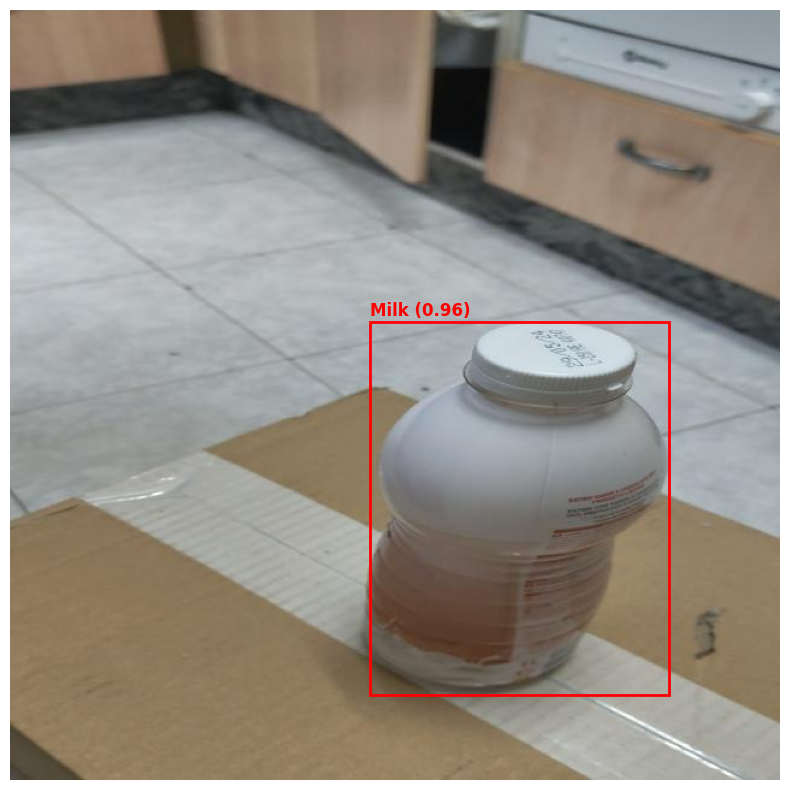

In [ ]:
def plot_boxes(image, boxes, labels, confidences):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()

    for (x, y, w, h), label, confidence in zip(boxes, labels, confidences):
        rect = plt.Rectangle((x, y), w, h, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        ax.text(x, y - 5, f'{label} ({confidence:.2f})', color='red', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()

plot_boxes(img, boxes, labels, confidences)